# Entrenamiento y Evaluación del Modelo MLP
 
En este notebook implementaremos y evaluaremos el modelo MLP para la predicción de bancarrota, incluyendo:
- Entrenamiento del modelo
- Evaluación con métricas ROC AUC y PR AUC
- Visualización de resultados
- Generación de predicciones finales



In [10]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.neural_network import MLPClassifier
import os

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

# Crear directorio para visualizaciones
os.makedirs('visualizaciones_modelos', exist_ok=True)

## 1. Carga de Datos Procesados

In [13]:
# Cargar datos procesados
print("Cargando datos procesados...")
X_train = np.load('../scripts/archivos/X_train_processed.npy')
y_train = np.load('../scripts/archivos/y_train_processed.npy')
X_test = np.load('../scripts/archivos/X_test_processed.npy')

# Cargar datos originales para IDs
test_data = pd.read_csv('../archivos/test_data.csv')

print(f"\nDimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")

Cargando datos procesados...

Dimensiones de los datos:
X_train: (3976, 63)
y_train: (3976,)
X_test: (500, 63)


## 2. Definición del Modelo MLP


In [14]:
# Definir modelo MLP
print("\nDefiniendo modelo MLP...")
model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True
)


Definiendo modelo MLP...


## 3. Entrenamiento y Evaluación del Modelo

In [15]:
# Separar datos para validación
print("\nSeparando datos para validación...")
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Entrenar modelo
print("\nEntrenando modelo...")
model.fit(X_train_split, y_train_split)

# Generar predicciones
y_pred_proba = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)


Separando datos para validación...

Entrenando modelo...


## 4. Visualización de Resultados

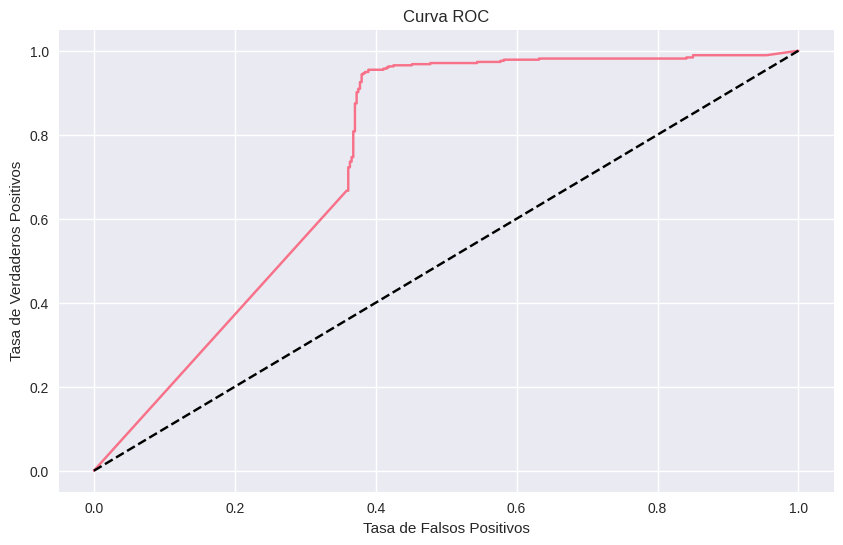

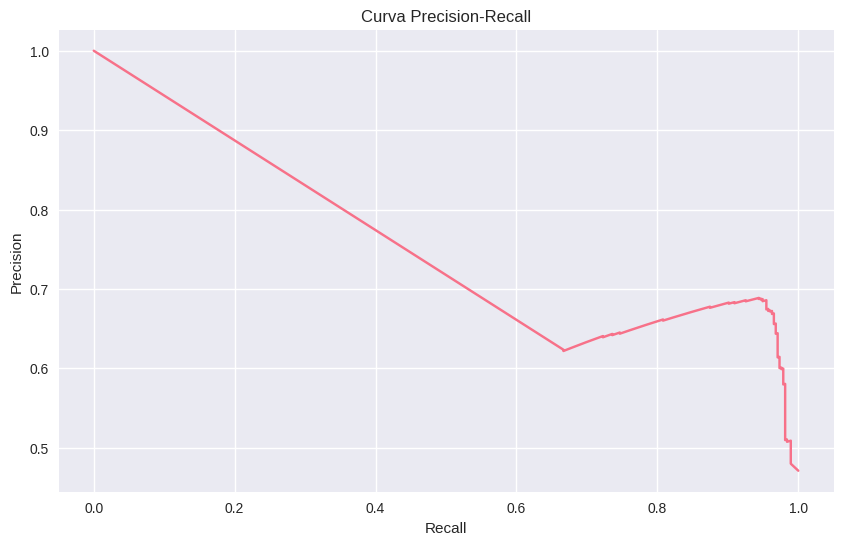

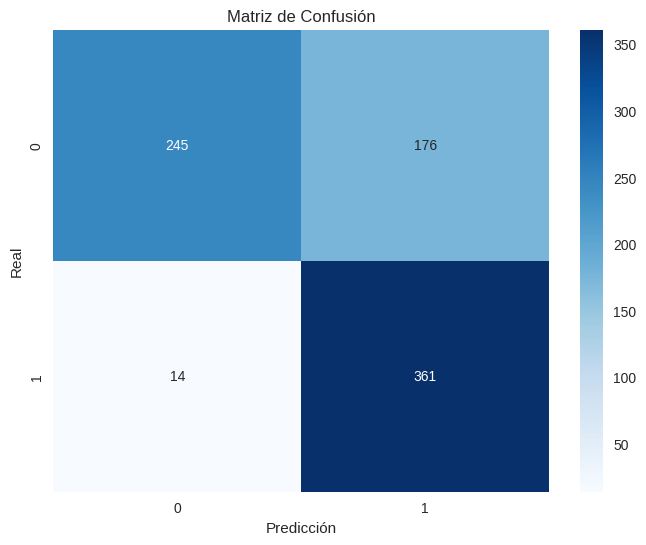

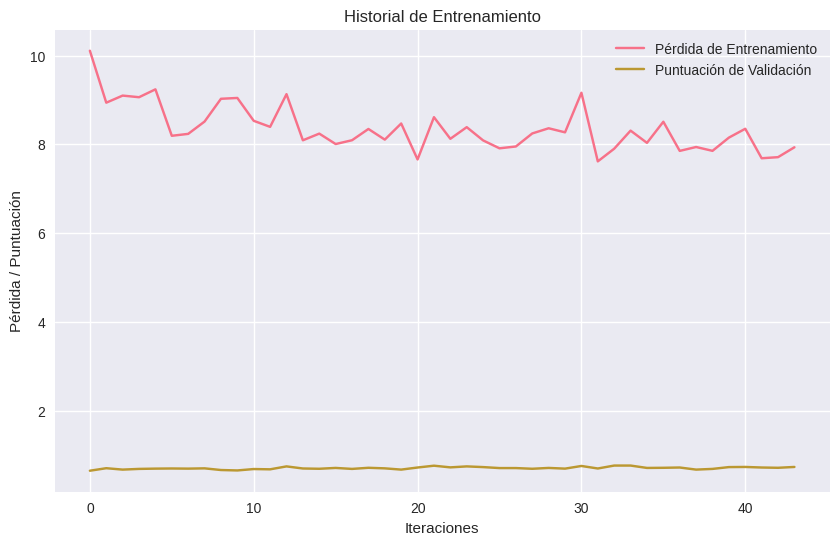

In [16]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.savefig('visualizaciones_modelos/01_curva_roc.png')
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.savefig('visualizaciones_modelos/02_curva_pr.png')
plt.show()

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.savefig('visualizaciones_modelos/03_matriz_confusion.png')
plt.show()

# Historial de entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, label='Pérdida de Entrenamiento')
if hasattr(model, 'validation_scores_'):
    plt.plot(model.validation_scores_, label='Puntuación de Validación')
plt.title('Historial de Entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida / Puntuación')
plt.legend()
plt.savefig('visualizaciones_modelos/04_historial_entrenamiento.png')
plt.show()

## 5. Evaluación con Validación Cruzada

In [17]:
# Evaluar modelo con validación cruzada
print("\nEvaluando modelo con validación cruzada...")
cv_results = cross_validate(
    model, X_train, y_train,
    cv=5,
    scoring={'roc_auc': 'roc_auc', 'average_precision': 'average_precision'},
    return_train_score=True
)

roc_auc = cv_results['test_roc_auc'].mean()
pr_auc = cv_results['test_average_precision'].mean()

print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")


Evaluando modelo con validación cruzada...
ROC AUC: 0.7264
PR AUC: 0.6451


## 6. Generación de Predicciones

In [18]:
print("\nEntrenando modelo con todos los datos...")
model.fit(X_train, y_train)

# Generar predicciones
print("\nGenerando predicciones...")
predictions = model.predict_proba(X_test)[:, 1]

# Crear submission
submission = pd.DataFrame({
    'ID': test_data['ID'],
    'Bankruptcy': predictions
})

# Guardar submission
submission.to_csv('archivos/submission.csv', index=False)
print("\nSubmission guardada exitosamente!")


Entrenando modelo con todos los datos...

Generando predicciones...

Submission guardada exitosamente!
